<a href="https://colab.research.google.com/github/JMML2021/0201-estructures_dades/blob/main/S03_T01_Visualitzaci%C3%B3_gr%C3%A0fica_d'un_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectiu general: 

Entendre i aplicar les diferents tècniques de visualització amb Python  
Objectius específics: 

Conèixer les diferents llibreries Matplotlib i Seaborn
Si algun recurs de towardsdatascience o medium demana registre, proveu d’obrir-lo en finestra d’incògnit.

 **# - Exercici 1**:

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

Una variable categòrica (UniqueCarrier)
Una variable numèrica (ArrDelay)
Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
Dues variables numèriques (ArrDelay i DepDelay)
Tres variables (ArrDelay, DepDelay i UniqueCarrier)
Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [ ]:
!pwd          # El comando pwd (de las siglas en inglés print working directory, cuya traducción sería imprimir directorio de trabajo) se utiliza para imprimir el nombre

/content


In [ ]:
# !pip install automl

In [ ]:
#from goolge.colab import drive
#drive mount('/content/gdriven')

In [ ]:
!ls
# https://www.youtube.com/watch?v=SDaC2bLKrFg

sample_data


In [1]:
import pandas as pd
import seaborn as sns

df= pd.read_csv('https://raw.githubusercontent.com/roberthryniewicz/datasets/master/airline-dataset/flights/flights.csv')
df.shape

(100000, 29)

Una variable categòrica (UniqueCarrier)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               100000 non-null  int64  
 1   Month              100000 non-null  int64  
 2   DayofMonth         100000 non-null  int64  
 3   DayOfWeek          100000 non-null  int64  
 4   DepTime            98858 non-null   float64
 5   CRSDepTime         100000 non-null  int64  
 6   ArrTime            98698 non-null   float64
 7   CRSArrTime         100000 non-null  int64  
 8   UniqueCarrier      100000 non-null  object 
 9   FlightNum          100000 non-null  int64  
 10  TailNum            98858 non-null   object 
 11  ActualElapsedTime  98698 non-null   float64
 12  CRSElapsedTime     100000 non-null  int64  
 13  AirTime            98698 non-null   float64
 14  ArrDelay           98698 non-null   float64
 15  DepDelay           98858 non-null   float64
 16  Ori

In [3]:
# Cuento las compañias que hay y la frecuencai con que se repite:

numero = df.groupby(df['UniqueCarrier']).count()

# Me quedo solo con la columna que necesito
borrarColumnas = ['Year','DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled'] 

df2 = numero.drop(borrarColumnas, axis=1)

df2 = df2.rename(columns={'Unnamed: 0': 'cantidadVuelos'})


print('Cantidad de vuelos realizados por cada compañía')
df2 = df2.rename(columns={'Month': 'cantidadVuelos'})
df2.head()

Cantidad de vuelos realizados por cada compañía


,cantidadVuelos,DayofMonth
UniqueCarrier,,
WN,94055,94055
XE,5945,5945


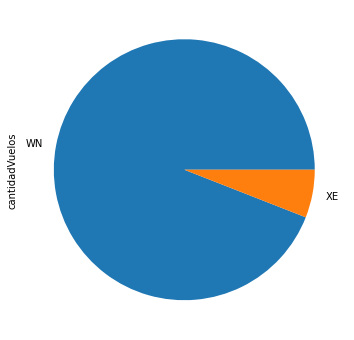

In [4]:
plot = df2['cantidadVuelos'].plot.pie(subplots=True, figsize=(11, 6))

In [5]:
df2.head()

,cantidadVuelos,DayofMonth
UniqueCarrier,,
WN,94055,94055
XE,5945,5945


Crea almenys una visualització per: Una variable numèrica (ArrDelay)

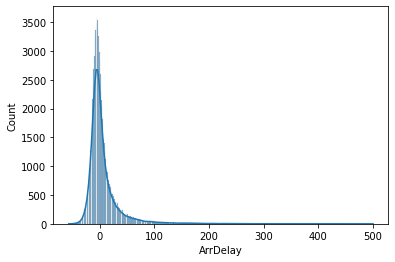

In [6]:
sns.histplot(data= df.ArrDelay, kde= True)

En este histograma vemos que la distribución no es normal y lo mejor es minimizar los outlaiers y ver como es la distribucion


Media filtrada =  2.54 minutos


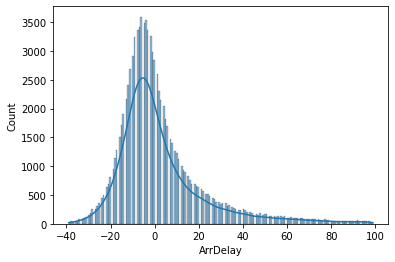

In [13]:
df2=df.copy()
dfEliminarOutliers=  df2['ArrDelay']>-40

df2 = df2[dfEliminarOutliers]

dfEliminarOutliers=  df2['ArrDelay']<100 

df2 = df2[dfEliminarOutliers]




sns.histplot(data= df2.ArrDelay, kde= True)
print()
print('Media filtrada = ', round(df2['ArrDelay'].mean(),2), 'minutos')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 




Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

['WN' 'XE']


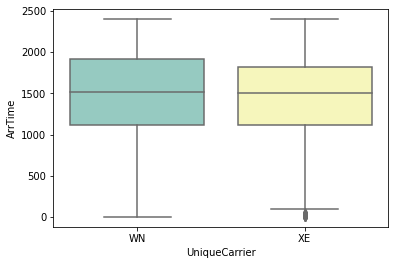

In [17]:

import seaborn as sns
companyias =df['UniqueCarrier'].unique()

print(companyias)

# Creo un boxplot por Carrier. 
sns.boxplot(x = 'UniqueCarrier', y = 'ArrTime', data= df, palette="Set3" ) 
 

Dues variables numèriques (ArrDelay i DepDelay)

Text(0.5, 1.0, 'ArrDelay v DepDelay')

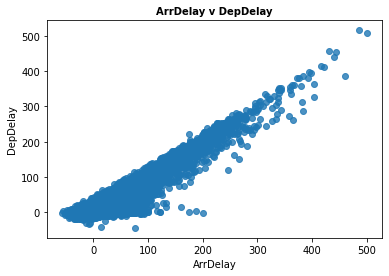

In [22]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.ArrDelay, y=df.DepDelay, alpha= 0.8)
ax.set_xlabel('ArrDelay')
ax.set_ylabel('DepDelay');

ax.set_title('ArrDelay v DepDelay', fontsize = 10, fontweight = "bold")

In [25]:

from scipy import stats

xx = np.nan_to_num(df.DepDelay)
yy = np.nan_to_num(df.ArrDelay)

# Correlación con outlier
r, p = stats.pearsonr(xx, yy)
print(f"Correlación Pearson con outlier: r={r}, p-value={p}")

Correlación Pearson con outlier: r=0.9367963656790669, p-value=0.0


Existe una correlacion importante porque p_value < 0.05, y la correlacion es positiva y con una R2 muy alta 93%

Tres variables (ArrDelay, DepDelay i UniqueCarrier)

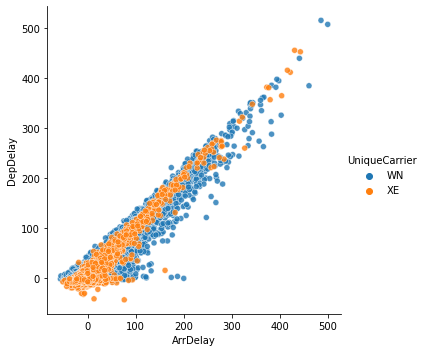

In [32]:
# Gráfico
# ==============================================================================

sns.relplot(x=df.ArrDelay, y=df.DepDelay, hue = df.UniqueCarrier, alpha= 0.8)


Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

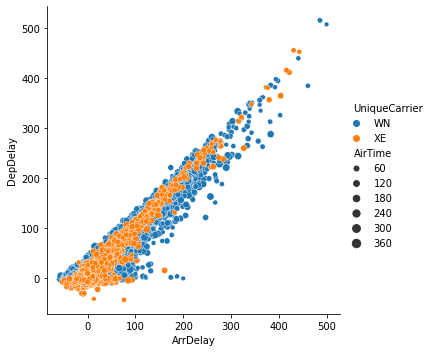

In [34]:
sns.relplot(x=df.ArrDelay, y=df.DepDelay, size=df.AirTime, hue = df.UniqueCarrier);

**- Exercici 2**

Exporta els gràfics com imatges o com html.

** Exercici 3**

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

Cargo la informacion del dataset de aquí:


---
*https://github.com/mdrilwan/datasets*